In [13]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import  Dense, Dropout, Activation, Input, Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.layers.normalization import BatchNormalization # new!
import cv2
from skimage.color import rgb2gray
from skimage import color
from skimage import io
import numpy as np

In [14]:
trainingData = "../data/train/GTSRB/Final_Training/Images/"
classes = (os.listdir(trainingData))

data = []
dataClasses = []

for i in range(len(classes)):
    listOfClasses = (trainingData+classes[i])
    dataClasses.append(listOfClasses)
    data.append(os.listdir(listOfClasses))
    
    

In [15]:
     
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()

import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

#readTrafficSigns("../data/train/GTSRB/Final_Training/Images")

39209 39209
1


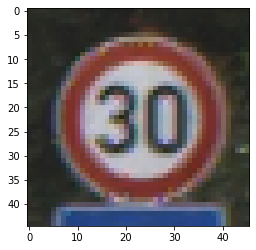

In [40]:
trainImages, trainLabels = readTrafficSigns("../data/train/GTSRB/Final_Training/Images")
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[500])
plt.show()

In [17]:
#print(trainImages[2])
#plt.imshow(trainImages[2])

def grayConversion(image):
    grayValue = 0.07 * image[:,:,0] + 0.72 * image[:,:,1] + 0.21 * image[:,:,2]
    gray_img = grayValue.astype(np.uint8)
    return gray_img



#plt.show()
final_images=[]
dim = (40, 40) 
for l in range(len(trainImages)):
    temp_img = (cv2.resize(trainImages[l], dim))
    final_images.append(rgb2gray(temp_img))

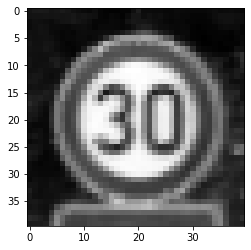

In [22]:
plt.imshow(final_images[500], cmap='Greys_r')
plt.show()

In [60]:
X = np.array(final_images)
Y = np.array(trainLabels)
X =X.reshape([-1,40, 40,1])
print(X.shape)
Y.dtype

(39209, 40, 40, 1)


dtype('<U2')

In [69]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(43, activation=tf.nn.relu))
# model.add(tf.keras.layers.Activation(tf.nn.softmax))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(43, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()



Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
dense_46 (Dense)             (None, 38, 38, 128)       4224      
_________________________________________________________________
dropout_23 (Dropout)         (None, 38, 38, 128)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 46208)             0         
_________________________________________________________________
dense_47 (Dense)             (None, 43)                1986987   
Total params: 1,991,531
Trainable params: 1,991,531
Non-trainable params: 0
___________________________________________

In [70]:
model.fit(X, Y.astype(int),epochs=10)#,verbose=1, batch_size = 128)

Train on 39209 samples
Epoch 1/10
39209/39209 [==============================] - 201s 5ms/sample - loss: 2.5101 - accuracy: 0.3610
Epoch 2/10
39209/39209 [==============================] - 189s 5ms/sample - loss: 1.5490 - accuracy: 0.6269
Epoch 3/10
39209/39209 [==============================] - 179s 5ms/sample - loss: 1.1119 - accuracy: 0.7289
Epoch 4/10
39209/39209 [==============================] - 179s 5ms/sample - loss: 0.8273 - accuracy: 0.7999
Epoch 5/10
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.6326 - accuracy: 0.8471
Epoch 6/10
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.4802 - accuracy: 0.8845
Epoch 7/10
39209/39209 [==============================] - 179s 5ms/sample - loss: 0.3668 - accuracy: 0.9120
Epoch 8/10
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.2984 - accuracy: 0.9283
Epoch 9/10
39209/39209 [==============================] - 179s 5ms/sample - loss: 0.2353 - accuracy: 0.9443
Epoch

In [83]:
model1 = Sequential()
model1.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(43, activation=tf.nn.softmax))
# model1.add(tf.keras.layers.Activation(tf.nn.softmax))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
dense_62 (Dense)             (None, 38, 38, 128)       4224      
_________________________________________________________________
dropout_32 (Dropout)         (None, 38, 38, 128)       0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 46208)             0         
_________________________________________________________________
dense_63 (Dense)             (None, 43)                1986987   
Total params: 1,991,531
Trainable params: 1,991,531
Non-trainable params: 0
___________________________________________

In [81]:
model1.fit(X, Y.astype(int),epochs=10)

Train on 39209 samples
Epoch 1/10
39209/39209 [==============================] - 211s 5ms/sample - loss: 2.5469 - accuracy: 0.3476
Epoch 2/10
39209/39209 [==============================] - 209s 5ms/sample - loss: 1.4623 - accuracy: 0.6457
Epoch 3/10
39209/39209 [==============================] - 207s 5ms/sample - loss: 0.8838 - accuracy: 0.7831
Epoch 4/10
39209/39209 [==============================] - 207s 5ms/sample - loss: 0.5630 - accuracy: 0.8662
Epoch 5/10
39209/39209 [==============================] - 207s 5ms/sample - loss: 0.3770 - accuracy: 0.9125
Epoch 6/10
39209/39209 [==============================] - 201s 5ms/sample - loss: 0.2725 - accuracy: 0.9369
Epoch 7/10
39209/39209 [==============================] - 203s 5ms/sample - loss: 0.2098 - accuracy: 0.9540
Epoch 8/10
39209/39209 [==============================] - 202s 5ms/sample - loss: 0.1690 - accuracy: 0.9618
Epoch 9/10
39209/39209 [==============================] - 210s 5ms/sample - loss: 0.1363 - accuracy: 0.9711
Epoch

In [84]:
model2 = Sequential()
model2.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
model2.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(43, activation=tf.nn.softmax))
# model2.add(tf.keras.layers.Activation(tf.nn.softmax))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
dense_64 (Dense)             (None, 38, 38, 128)       4224      
_________________________________________________________________
dropout_33 (Dropout)         (None, 38, 38, 128)       0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 17, 17, 32)        36896     
_________________________________________________________________
dense_65 (Dense)             (None, 17, 17, 128)       4224      
_________________________________________________________________
dropout_34 (Dropout)         (None, 17, 17, 128)     

In [85]:
model1.fit(X, Y.astype(int),epochs=10)

Train on 39209 samples
Epoch 1/10
39209/39209 [==============================] - 315s 8ms/sample - loss: 2.4929 - accuracy: 0.3657
Epoch 2/10
39209/39209 [==============================] - 311s 8ms/sample - loss: 1.3762 - accuracy: 0.6622
Epoch 3/10
 1472/39209 [>.............................] - ETA: 4:52 - loss: 1.0920 - accuracy: 0.7174

KeyboardInterrupt: 